In [105]:
import pandas as pd
import nltk
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdzak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading Data

In [106]:
# mr = pd.read_excel('datasets/datasets.xls', sheet_name='MR',header=None)

In [135]:
mr = pd.read_csv('../labelled1000(final).csv',header=0)
mr

,id,User,Date Created,Number of Likes,Source of Tweet,Tweet,sentiment_1,opinion_1,sentiment_2,opinion_2,inter_annotator_agreement
0,19.0,krystaalm,7/3/2023 7:23,0.0,Twitter for iPhone,"Trying to move with a baby, having you mom liv...",negative,opinionated,neutral,neutral,0.0
1,66.0,lordpsydra,5/3/2023 7:07,0.0,Twitter for Android,I honestly will probably never leave Washingto...,negative,opinionated,neutral,neutral,0.0
2,99.0,BrigetteLaurys,4/3/2023 3:56,0.0,Twitter for iPhone,"""Trying to move to another country is a humbli...",negative,opinionated,neutral,neutral,0.0
3,531.0,mznchnakv,7/2/2023 15:00,0.0,Twitter for Android,Doubtful..move to another country,negative,opinionated,positive,opinionated,0.0
4,850.0,marstriakis,18/1/2023 17:57,3.0,Twitter for iPad,my brother is convinced that imma move to Toro...,negative,opinionated,positive,opinionated,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1337,1337.0,Kristenalyy_,21/12/2022 11:15,0.0,Twitter Web App,"That sudden urge to quit uni, move to another ...",positive,opinionated,positive,opinionated,1.0
1338,1338.0,loversfeast,21/12/2022 10:07,5.0,Twitter for iPhone,i always found it really funny that ranboos pa...,positive,opinionated,positive,opinionated,1.0
1339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
mr = mr[['Tweet', 'opinion_2','sentiment_2'] ] 
mr = mr.dropna()

In [149]:
mr

,Tweet,opinion_2,sentiment_2
0,"Trying to move with a baby, having you mom liv...",neutral,neutral
1,I honestly will probably never leave Washingto...,neutral,neutral
2,"""Trying to move to another country is a humbli...",neutral,neutral
3,Doubtful..move to another country,opinionated,positive
4,my brother is convinced that imma move to Toro...,opinionated,positive
...,...,...,...
1334,the urge to move to another country and start ...,opinionated,positive
1335,I've done this but I'm not contented I need to...,opinionated,positive
1336,"the urge to fake your death, move to another c...",opinionated,positive
1337,"That sudden urge to quit uni, move to another ...",opinionated,positive


In [147]:
mr[mr['opinion_2'] == 'opinionated']

,Tweet,opinion_2,sentiment_2
3,Doubtful..move to another country,opinionated,positive
4,my brother is convinced that imma move to Toro...,opinionated,positive
5,The way I want to drop everything and move to ...,opinionated,positive
6,Uk is such bad vybes that if I was &gt; 25 wit...,opinionated,positive
7,I say I move to another country /j I can't,opinionated,positive
...,...,...,...
1334,the urge to move to another country and start ...,opinionated,positive
1335,I've done this but I'm not contented I need to...,opinionated,positive
1336,"the urge to fake your death, move to another c...",opinionated,positive
1337,"That sudden urge to quit uni, move to another ...",opinionated,positive


In [143]:
import matplotlib.pyplot as plt

In [144]:
plot_df = pd.DataFrame({'Sentiment':['Positive', 'Negative'], 'value': [802,235]})

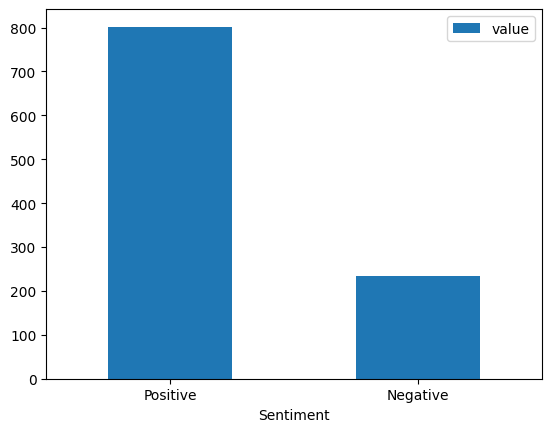

In [145]:
ax = plot_df.plot.bar(x='Sentiment', y='value', rot=0)

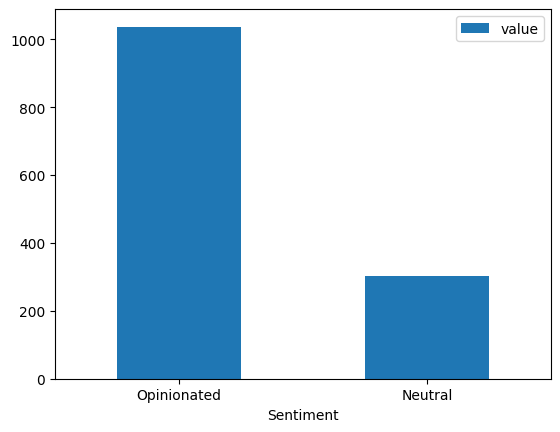

In [148]:
plot_df = pd.DataFrame({'Sentiment':['Opinionated', 'Neutral'], 'value': [1037,302]})
ax = plot_df.plot.bar(x='Sentiment', y='value', rot=0)

### Pre process

In [115]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [116]:
def remove_contractions(text):
    words = text.split()
    reformed = " ".join(CONTRACTION_MAP[word] if word in CONTRACTION_MAP else word for word in words)
    return reformed

mr['Tweet'] = mr['Tweet'].apply(lambda x: remove_contractions(x))

mr

,Tweet,opinion_2,sentiment_2
0,"Trying to move with a baby, having you mom liv...",neutral,neutral
1,I honestly will probably never leave Washingto...,neutral,neutral
2,"""Trying to move to another country is a humbli...",neutral,neutral
3,Doubtful..move to another country,opinionated,positive
4,my brother is convinced that imma move to Toro...,opinionated,positive
...,...,...,...
1334,the urge to move to another country and start ...,opinionated,positive
1335,I have done this but I am not contented I need...,opinionated,positive
1336,"the urge to fake your death, move to another c...",opinionated,positive
1337,"That sudden urge to quit uni, move to another ...",opinionated,positive


In [129]:
print("Before: applying to move to another country is the scariest thing I've ever impulsively acted on ")
print("After: ", remove_contractions("applying to move to another country is the scariest thing I've ever impulsively acted on "))

Before: applying to move to another country is the scariest thing I've ever impulsively acted on 
After:  applying to move to another country is the scariest thing I have ever impulsively acted on


In [117]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [118]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []

    tokens.append(token)
  return " ".join(tokens)

In [128]:
print("Before: @User . The only thing concern me for so long if i move/visit another country thats use only toilet paper. Please thats gross. I need to pray. Cant even imagine life like that.  #nohate https://t.co/ejMa9wkrbI")
print("After: ",preprocess("@User . The only thing concern me for so long if i move/visit another country thats use only toilet paper. Please thats gross. I need to pray. Cant even imagine life like that.  #nohate https://t.co/ejMa9wkrbI"))

Before: @User . The only thing concern me for so long if i move/visit another country thats use only toilet paper. Please thats gross. I need to pray. Cant even imagine life like that.  #nohate https://t.co/ejMa9wkrbI
After:  the only thing concern me for so long if i move visit another country thats use only toilet paper please thats gross i need to pray cant even imagine life like that nohate


In [119]:
mr.text = mr.Tweet.apply(lambda x: preprocess(x))

C:\Users\mdzak\AppData\Local\Temp\ipykernel_17228\2931171012.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mr.text = mr.Tweet.apply(lambda x: preprocess(x))


In [120]:
mr

,Tweet,opinion_2,sentiment_2
0,"Trying to move with a baby, having you mom liv...",neutral,neutral
1,I honestly will probably never leave Washingto...,neutral,neutral
2,"""Trying to move to another country is a humbli...",neutral,neutral
3,Doubtful..move to another country,opinionated,positive
4,my brother is convinced that imma move to Toro...,opinionated,positive
...,...,...,...
1334,the urge to move to another country and start ...,opinionated,positive
1335,I have done this but I am not contented I need...,opinionated,positive
1336,"the urge to fake your death, move to another c...",opinionated,positive
1337,"That sudden urge to quit uni, move to another ...",opinionated,positive


In [121]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    tokens = []
    for word in text.split():
        lem_word = wordnet_lemmatizer.lemmatize(word)
        tokens.append(lem_word)
    return " ".join(tokens)

In [133]:
print("Before: My grandma moves the entire extended family from Jamaica")
print("After: ", lemmatizer("My grandma moves the entire extended family from Jamaica"))


Before: My grandma moves the entire extended family from Jamaica
After:  My grandma move the entire extended family from Jamaica


In [122]:
mr['Tweet'] = mr['Tweet'].apply(lambda x:lemmatizer(x))
mr

,Tweet,opinion_2,sentiment_2
0,"Trying to move with a baby, having you mom liv...",neutral,neutral
1,I honestly will probably never leave Washingto...,neutral,neutral
2,"""Trying to move to another country is a humbli...",neutral,neutral
3,Doubtful..move to another country,opinionated,positive
4,my brother is convinced that imma move to Toro...,opinionated,positive
...,...,...,...
1334,the urge to move to another country and start ...,opinionated,positive
1335,I have done this but I am not contented I need...,opinionated,positive
1336,"the urge to fake your death, move to another c...",opinionated,positive
1337,"That sudden urge to quit uni, move to another ...",opinionated,positive


### Export

In [123]:
def define_class(text):
    if text == 'opinionated':
        return 1
    elif text == 'neutral':
        return -1
    else:
        return 0
mr['opinion_2'] = mr['opinion_2'].apply(lambda x: define_class(x))

def define_class_pol(text):
    if text == 'positive':
        return 1
    elif text == 'negative':
        return -1
    else:
        return 0
mr['sentiment_2'] = mr['sentiment_2'].apply(lambda x: define_class_pol(x))
mr

,Tweet,opinion_2,sentiment_2
0,"Trying to move with a baby, having you mom liv...",-1,0
1,I honestly will probably never leave Washingto...,-1,0
2,"""Trying to move to another country is a humbli...",-1,0
3,Doubtful..move to another country,1,1
4,my brother is convinced that imma move to Toro...,1,1
...,...,...,...
1334,the urge to move to another country and start ...,1,1
1335,I have done this but I am not contented I need...,1,1
1336,"the urge to fake your death, move to another c...",1,1
1337,"That sudden urge to quit uni, move to another ...",1,1


In [124]:

mr.to_csv('1000_dataset_cleaned.csv')

### Punctuation Removal

In [45]:
import string
string.punctuation
newpunctuation = '!"#$%&\()*+,./:;<=>?[\\]^_`{|}~'
hyphen = '-'
apos = "'"


In [46]:
newpunctuation

'!"#$%&\\()*+,./:;<=>?[\\]^_`{|}~'

In [47]:
def remove_punc(text):
    punctuationfree="".join([i for i in text if i not in newpunctuation])
    return punctuationfree

In [48]:
mr['no_punc_text'] = mr['text'].apply(lambda x: remove_punc(x))

In [49]:
mr

,text,sentiment,no_punc_text
0,"""Just move to a completely different location""...",NEUTRAL,Just move to a completely different location i...
1,I've started sharing information again about h...,POSITIVE,I've started sharing information again about h...
2,My parents made the tough decision to move the...,NEGATIVE,My parents made the tough decision to move the...
3,"Aye, y'all tryna head out? It's too wild over ...",NEUTRAL,Aye y'all tryna head out It's too wild over he...
4,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY. ...,NEGATIVE,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY W...
...,...,...,...
1265,"In SEPARATION ANXIETY, Gavin Bradley tracks th...",POSITIVE,In SEPARATION ANXIETY Gavin Bradley tracks the...
1266,The crippling Asian elder daughter feelings th...,NEUTRAL,The crippling Asian elder daughter feelings th...
1267,was on the phone with my dad last night and he...,NEGATIVE,was on the phone with my dad last night and he...
1268,You may qualify to take advantage of two possi...,NEUTRAL,You may qualify to take advantage of two possi...


### Seperated hyphenated words

In [50]:
hyphen_dict = {
    "-" : " "
}

In [51]:
def remove_hyphen(text):
    hyphenfree = "".join(hyphen_dict[text] if text in hyphen_dict else text for text in text)
    return hyphenfree

In [52]:
mr['no_punc_text'] = mr['no_punc_text'].apply(lambda x: remove_hyphen(x))

In [53]:
mr

,text,sentiment,no_punc_text
0,"""Just move to a completely different location""...",NEUTRAL,Just move to a completely different location i...
1,I've started sharing information again about h...,POSITIVE,I've started sharing information again about h...
2,My parents made the tough decision to move the...,NEGATIVE,My parents made the tough decision to move the...
3,"Aye, y'all tryna head out? It's too wild over ...",NEUTRAL,Aye y'all tryna head out It's too wild over he...
4,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY. ...,NEGATIVE,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY W...
...,...,...,...
1265,"In SEPARATION ANXIETY, Gavin Bradley tracks th...",POSITIVE,In SEPARATION ANXIETY Gavin Bradley tracks the...
1266,The crippling Asian elder daughter feelings th...,NEUTRAL,The crippling Asian elder daughter feelings th...
1267,was on the phone with my dad last night and he...,NEGATIVE,was on the phone with my dad last night and he...
1268,You may qualify to take advantage of two possi...,NEUTRAL,You may qualify to take advantage of two possi...


### Remove Contractions

In [54]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [55]:
def remove_contractions(text):
    words = text.split()
    reformed = " ".join(CONTRACTION_MAP[word] if word in CONTRACTION_MAP else word for word in words)
    return reformed

mr['no_punc_text'] = mr['no_punc_text'].apply(lambda x: remove_contractions(x))

In [57]:
mr

,text,sentiment,no_punc_text
0,"""Just move to a completely different location""...",NEUTRAL,Just move to a completely different location i...
1,I've started sharing information again about h...,POSITIVE,I have started sharing information again about...
2,My parents made the tough decision to move the...,NEGATIVE,My parents made the tough decision to move the...
3,"Aye, y'all tryna head out? It's too wild over ...",NEUTRAL,Aye you all tryna head out It's too wild over ...
4,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY. ...,NEGATIVE,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY W...
...,...,...,...
1265,"In SEPARATION ANXIETY, Gavin Bradley tracks th...",POSITIVE,In SEPARATION ANXIETY Gavin Bradley tracks the...
1266,The crippling Asian elder daughter feelings th...,NEUTRAL,The crippling Asian elder daughter feelings th...
1267,was on the phone with my dad last night and he...,NEGATIVE,was on the phone with my dad last night and he...
1268,You may qualify to take advantage of two possi...,NEUTRAL,You may qualify to take advantage of two possi...


### Remove " 's " that are possessive nouns

In [58]:
newpunctuation = '!"#$%&\'()*+,-./:;<=>?[\\]^_`{|}~'

def remove_pos_nouns(text):
    punctuationfree="".join([i for i in text if i not in newpunctuation])
    return punctuationfree

In [59]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
mr['no_punc_text'] = mr['no_punc_text'].apply(lambda x: remove_pos_nouns(x))

In [61]:
mr

,text,sentiment,no_punc_text
0,"""Just move to a completely different location""...",NEUTRAL,Just move to a completely different location i...
1,I've started sharing information again about h...,POSITIVE,I have started sharing information again about...
2,My parents made the tough decision to move the...,NEGATIVE,My parents made the tough decision to move the...
3,"Aye, y'all tryna head out? It's too wild over ...",NEUTRAL,Aye you all tryna head out Its too wild over h...
4,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY. ...,NEGATIVE,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY W...
...,...,...,...
1265,"In SEPARATION ANXIETY, Gavin Bradley tracks th...",POSITIVE,In SEPARATION ANXIETY Gavin Bradley tracks the...
1266,The crippling Asian elder daughter feelings th...,NEUTRAL,The crippling Asian elder daughter feelings th...
1267,was on the phone with my dad last night and he...,NEGATIVE,was on the phone with my dad last night and he...
1268,You may qualify to take advantage of two possi...,NEUTRAL,You may qualify to take advantage of two possi...


### Lower case text

In [62]:
mr["no_punc_text"]= mr['no_punc_text'].apply(lambda x: x.lower())

In [63]:
mr.head()

,text,sentiment,no_punc_text
0,"""Just move to a completely different location""...",NEUTRAL,just move to a completely different location i...
1,I've started sharing information again about h...,POSITIVE,i have started sharing information again about...
2,My parents made the tough decision to move the...,NEGATIVE,my parents made the tough decision to move the...
3,"Aye, y'all tryna head out? It's too wild over ...",NEUTRAL,aye you all tryna head out its too wild over h...
4,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY. ...,NEGATIVE,when is val going to move to another country w...


### Tokenization and remove twitter handle

In [64]:
from nltk.tokenize import TweetTokenizer
def rem_handle_tokenize(text):
    tknzr = TweetTokenizer(strip_handles=True)
    clean_text = tknzr.tokenize(text)
    return clean_text

In [65]:
mr['text_tokenized'] = mr['no_punc_text'].apply(lambda x: rem_handle_tokenize(x))

In [66]:
mr

,text,sentiment,no_punc_text,text_tokenized
0,"""Just move to a completely different location""...",NEUTRAL,just move to a completely different location i...,"[just, move, to, a, completely, different, loc..."
1,I've started sharing information again about h...,POSITIVE,i have started sharing information again about...,"[i, have, started, sharing, information, again..."
2,My parents made the tough decision to move the...,NEGATIVE,my parents made the tough decision to move the...,"[my, parents, made, the, tough, decision, to, ..."
3,"Aye, y'all tryna head out? It's too wild over ...",NEUTRAL,aye you all tryna head out its too wild over h...,"[aye, you, all, tryna, head, out, its, too, wi..."
4,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY. ...,NEGATIVE,when is val going to move to another country w...,"[when, is, val, going, to, move, to, another, ..."
...,...,...,...,...
1265,"In SEPARATION ANXIETY, Gavin Bradley tracks th...",POSITIVE,in separation anxiety gavin bradley tracks the...,"[in, separation, anxiety, gavin, bradley, trac..."
1266,The crippling Asian elder daughter feelings th...,NEUTRAL,the crippling asian elder daughter feelings th...,"[the, crippling, asian, elder, daughter, feeli..."
1267,was on the phone with my dad last night and he...,NEGATIVE,was on the phone with my dad last night and he...,"[was, on, the, phone, with, my, dad, last, nig..."
1268,You may qualify to take advantage of two possi...,NEUTRAL,you may qualify to take advantage of two possi...,"[you, may, qualify, to, take, advantage, of, t..."


### Stopwords

In [67]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [68]:
mr['no_stopwords']= mr['text_tokenized'].apply(lambda x:remove_stopwords(x))

In [69]:
mr.head()

,text,sentiment,no_punc_text,text_tokenized,no_stopwords
0,"""Just move to a completely different location""...",NEUTRAL,just move to a completely different location i...,"[just, move, to, a, completely, different, loc...","[move, completely, different, location, costs,..."
1,I've started sharing information again about h...,POSITIVE,i have started sharing information again about...,"[i, have, started, sharing, information, again...","[started, sharing, information, move, another,..."
2,My parents made the tough decision to move the...,NEGATIVE,my parents made the tough decision to move the...,"[my, parents, made, the, tough, decision, to, ...","[parents, made, tough, decision, move, family,..."
3,"Aye, y'all tryna head out? It's too wild over ...",NEUTRAL,aye you all tryna head out its too wild over h...,"[aye, you, all, tryna, head, out, its, too, wi...","[aye, tryna, head, wild, googles, get, visa, m..."
4,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY. ...,NEGATIVE,when is val going to move to another country w...,"[when, is, val, going, to, move, to, another, ...","[val, going, move, another, country, cooking, ..."


### Lemmatization

In [70]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [71]:
mr['text_lemmatized'] = mr['no_stopwords'].apply(lambda x:lemmatizer(x))

In [72]:
mr

,text,sentiment,no_punc_text,text_tokenized,no_stopwords,text_lemmatized
0,"""Just move to a completely different location""...",NEUTRAL,just move to a completely different location i...,"[just, move, to, a, completely, different, loc...","[move, completely, different, location, costs,...","[move, completely, different, location, cost, ..."
1,I've started sharing information again about h...,POSITIVE,i have started sharing information again about...,"[i, have, started, sharing, information, again...","[started, sharing, information, move, another,...","[started, sharing, information, move, another,..."
2,My parents made the tough decision to move the...,NEGATIVE,my parents made the tough decision to move the...,"[my, parents, made, the, tough, decision, to, ...","[parents, made, tough, decision, move, family,...","[parent, made, tough, decision, move, family, ..."
3,"Aye, y'all tryna head out? It's too wild over ...",NEUTRAL,aye you all tryna head out its too wild over h...,"[aye, you, all, tryna, head, out, its, too, wi...","[aye, tryna, head, wild, googles, get, visa, m...","[aye, tryna, head, wild, google, get, visa, mo..."
4,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY. ...,NEGATIVE,when is val going to move to another country w...,"[when, is, val, going, to, move, to, another, ...","[val, going, move, another, country, cooking, ...","[val, going, move, another, country, cooking, ..."
...,...,...,...,...,...,...
1265,"In SEPARATION ANXIETY, Gavin Bradley tracks th...",POSITIVE,in separation anxiety gavin bradley tracks the...,"[in, separation, anxiety, gavin, bradley, trac...","[separation, anxiety, gavin, bradley, tracks, ...","[separation, anxiety, gavin, bradley, track, e..."
1266,The crippling Asian elder daughter feelings th...,NEUTRAL,the crippling asian elder daughter feelings th...,"[the, crippling, asian, elder, daughter, feeli...","[crippling, asian, elder, daughter, feelings, ...","[crippling, asian, elder, daughter, feeling, c..."
1267,was on the phone with my dad last night and he...,NEGATIVE,was on the phone with my dad last night and he...,"[was, on, the, phone, with, my, dad, last, nig...","[phone, dad, last, night, asking, job, going, ...","[phone, dad, last, night, asking, job, going, ..."
1268,You may qualify to take advantage of two possi...,NEUTRAL,you may qualify to take advantage of two possi...,"[you, may, qualify, to, take, advantage, of, t...","[may, qualify, take, advantage, two, possible,...","[may, qualify, take, advantage, two, possible,..."


### Export preprocessed data

In [73]:
def remove_punc(text):
    punctuationfree=" ".join([i for i in text if i not in string.punctuation])
    return punctuationfree

mr['text_lemmatized'] = mr['text_lemmatized'].apply(lambda x: remove_punc(x))

In [74]:
def define_class(text):
    if text == 'POSITIVE':
        return 1
    elif text == 'NEGATIVE':
        return -1
    else:
        return 0
mr['sentiment'] = mr['sentiment'].apply(lambda x: define_class(x))
mr

,text,sentiment,no_punc_text,text_tokenized,no_stopwords,text_lemmatized
0,"""Just move to a completely different location""...",0,just move to a completely different location i...,"[just, move, to, a, completely, different, loc...","[move, completely, different, location, costs,...",move completely different location cost hundre...
1,I've started sharing information again about h...,1,i have started sharing information again about...,"[i, have, started, sharing, information, again...","[started, sharing, information, move, another,...",started sharing information move another count...
2,My parents made the tough decision to move the...,-1,my parents made the tough decision to move the...,"[my, parents, made, the, tough, decision, to, ...","[parents, made, tough, decision, move, family,...",parent made tough decision move family another...
3,"Aye, y'all tryna head out? It's too wild over ...",0,aye you all tryna head out its too wild over h...,"[aye, you, all, tryna, head, out, its, too, wi...","[aye, tryna, head, wild, googles, get, visa, m...",aye tryna head wild google get visa move anoth...
4,WHEN IS VAL GOING TO MOVE TO ANOTHER COUNTRY. ...,-1,when is val going to move to another country w...,"[when, is, val, going, to, move, to, another, ...","[val, going, move, another, country, cooking, ...",val going move another country cooking opinion...
...,...,...,...,...,...,...
1265,"In SEPARATION ANXIETY, Gavin Bradley tracks th...",1,in separation anxiety gavin bradley tracks the...,"[in, separation, anxiety, gavin, bradley, trac...","[separation, anxiety, gavin, bradley, tracks, ...",separation anxiety gavin bradley track experie...
1266,The crippling Asian elder daughter feelings th...,0,the crippling asian elder daughter feelings th...,"[the, crippling, asian, elder, daughter, feeli...","[crippling, asian, elder, daughter, feelings, ...",crippling asian elder daughter feeling choke e...
1267,was on the phone with my dad last night and he...,-1,was on the phone with my dad last night and he...,"[was, on, the, phone, with, my, dad, last, nig...","[phone, dad, last, night, asking, job, going, ...",phone dad last night asking job going amp dati...
1268,You may qualify to take advantage of two possi...,0,you may qualify to take advantage of two possi...,"[you, may, qualify, to, take, advantage, of, t...","[may, qualify, take, advantage, two, possible,...",may qualify take advantage two possible tax ex...


In [75]:
preprocessed_data = mr[['text','text_lemmatized','sentiment']]
preprocessed_data.to_csv('preprocessed_eval_data.csv')